In [52]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [53]:
content = []
with open("../data/raw/testdata/enwiki-20200101-page-meta-history2.xml-ptest", encoding = 'utf8') as file:
    
    content = file.readlines()
    content = "".join(content)
    soup = BeautifulSoup(content, "xml")


In [54]:
pages = soup.findAll("page")

In [55]:
data = []
for page in pages:
    title = page.title.text
    revisions = page.findAll("revision")
    
    for revision in revisions:
        r_id = revision.id.text 
        time = revision.timestamp.text
        try:
            username = revision.contributor.username.text
        except: 
            username = revision.contributor.ip.text
        text = revision.format.next_sibling.next_sibling.text
        data.append([title, r_id, time, username, text])

data[0]

['Emma of Normandy',
 '15604',
 '2002-02-21T15:11:49Z',
 'David Parker',
 "[[Emma]] (c.982-1052), daughter of [[Robert I, Duke of Normandy|Robert I]], , duke of [[Normandy]], was twice queen of [[England]], by marriage first (1002-1016) to king [[Ethelred the Unready]] and then (1017-1035) to [[Canute]], king also of [[Denmark]] and [[Norway]]. \n\nUpon the Danish invasion of England in 1013, Emma took her sons by Ethelred, Alfred and [[Edward the Confessor|Edward]] to Normandy, where they remained upon her return to England to marry Canute, now king of England following the death of Ethelred, with whom he had agreed to divide the realm. \n\nFollowing Canute's death, Alfred and Edward returned in 1036 to overthrow Canute's illegitimate son [[Harold Harefoot]], who had established himself as ruler in the absence of [[Harthacanute]], son of Canute and Emma. Alfred was captured and killed, while Edward escaped to Normandy, followed by his mother. \n\nThe death of Harold (1040) and the acc

In [56]:
df = pd.DataFrame(data, columns = ['title', 'id', 'time', 'username', 'text'])
df.head()

,title,id,time,username,text
0,Emma of Normandy,15604,2002-02-21T15:11:49Z,David Parker,"[[Emma]] (c.982-1052), daughter of [[Robert I,..."
1,Emma of Normandy,15606,2002-02-21T15:14:16Z,Vicki Rosenzweig,"'''Emma''' (c. 982-1052), daughter of [[Robert..."
2,Emma of Normandy,15635,2002-02-21T16:06:19Z,David Parker,"<b>Emma</b> (c.982-1052), daughter of [[Robert..."
3,Emma of Normandy,17121,2002-02-24T08:19:24Z,David Parker,"<b>Emma</b> (c.982-1052), daughter of [[Richar..."
4,Emma of Normandy,35038,2002-02-25T15:51:15Z,David Parker,"<b>Emma</b> (c.982-1052), daughter of [[Richar..."


In [59]:
light_dump = []
naruto = False
with open("../data/raw/testdata/en_wiki_test.txt", encoding = 'utf8') as file:
    for line in file:
        if (line[0]!= "^") & naruto:
            break
        
        if line.strip() == 'Emma_of_Normandy':
            naruto = True
            continue
            
        if naruto:
            light_dump.append(line)
            
light_dump = [x[4:-1].split(' ') for x in light_dump]
light_dump[:45]

[['2010-01-18T04:15:38Z', '1', '195', 'RoyBoy'],
 ['2010-01-17T16:05:25Z', '0', '196', '92.2.115.71'],
 ['2010-01-06T02:52:05Z', '0', '195', '69.138.191.61'],
 ['2010-01-06T02:08:18Z', '0', '194', '69.138.191.61'],
 ['2009-12-31T20:36:11Z', '0', '193', 'Unscented'],
 ['2009-12-25T11:18:42Z', '0', '192', '123.255.28.59'],
 ['2009-12-25T11:16:01Z', '0', '191', '123.255.28.59'],
 ['2009-12-25T11:12:12Z', '0', '190', '123.255.28.59'],
 ['2009-12-01T23:27:02Z', '0', '189', '94.1.155.242'],
 ['2009-11-17T12:38:08Z', '0', '188', 'Rich_Farmbrough'],
 ['2009-11-01T06:08:53Z', '1', '186', 'ClueBot'],
 ['2009-11-01T06:08:47Z', '0', '187', '124.187.131.183'],
 ['2009-10-25T18:21:34Z', '0', '186', 'Felix_Folio_Secundus'],
 ['2009-10-25T18:19:36Z', '0', '185', 'Felix_Folio_Secundus'],
 ['2009-10-23T01:11:22Z', '0', '184', "Queen_Elizabeth_II's_Little_Spy"],
 ['2009-10-18T18:41:40Z', '0', '183', 'Felix_Folio_Secundus'],
 ['2009-10-18T14:17:12Z', '0', '182', '86.129.28.159'],
 ['2009-10-18T14:12:22Z',

In [42]:
# data = []
# for page in pages:
#     try:
#         title = page.title.text
#     except:
#         title = none
        
#     try:
#         ns = page.ns.text
#     except: 
#         ns = none
        
#     try:
#         page_id = page.id.text
#     except:
#         page_id = none
    
#     try:
#         revision_id = page.revision.id.text
#     except:
#         revision_id = none
    
#     try:
#         parent_id = page.parent.id.text
#     except:
#         parent_id = none
    
#     try:
#         timestamp = page.timestamp.text
#     except:
#         timestamp = none
        
#     try:
#         username = page.contributor.username.text
#     except:
#         username = none
        
#     try:
#         contributor_id = page.contributor.id.text
#     except:
#         contributor_id = none
        
#     try:
#         comment = page.comment.text
#     except:
#         comment = none
    
#     try:
#         model = page.model.text
#     except:
#         model = none
        
#     try:
#         page_format = page.format.text
#     except:
#         page_format = none
        
        
#     try:
#         text = page.format.next_sibling.next_sibling.text
#     except:
#         text = none
        
#     data.append([title, ns, page_id, revision_id, parent_id, timestamp, username, 
#             contributor_id, comment, model, page_format, text])
# data[0]

In [5]:
df = pd.DataFrame(data, columns = ['title', 'ns', 'page_id', 'revision_id', 'parent_id', 'timestamp', 'username', 'contributor_id', 'comment', 'model', 'page_format', 'text'])
df.head()

,title,ns,page_id,revision_id,parent_id,timestamp,username,contributor_id,comment,model,page_format,text
0,Altoona and Wopsononock Railroad,0,11424669,133553189,11424669,2007-05-26T02:23:31Z,Choess,245519,redirect,wikitext,text/x-wiki,#REDIRECT [[Altoona and Beech Creek Railroad]]
1,User talk:87.41.23.88,3,11424671,133553219,11424669,2007-05-26T02:23:45Z,Stepp-Wulf,80874,mild warning to vandal.,wikitext,text/x-wiki,The silliness you inserted into Takeshi's Cast...
2,Altoona & Wopsononock Railroad,0,11424672,133553226,11424669,2007-05-26T02:23:50Z,Choess,245519,redirect,wikitext,text/x-wiki,#REDIRECT [[Altoona and Beech Creek Railroad]]
3,Westview Village,0,11424674,133553231,11424669,2007-05-26T02:23:52Z,Johntwrl,2121913,[[WP:AES|←]]Redirected page to [[Westview Vill...,wikitext,text/x-wiki,#REDIRECT [[Westview Village (Edmonton)]]
4,Matysiakowie,0,11424676,133553269,11424669,2007-05-26T02:24:07Z,Piotrus,59002,stub from pl wiki,wikitext,text/x-wiki,'''Matysiakowie''' is one of the most popular ...


In [8]:
df.shape

(142, 12)

(array([ 26.,   2., 108.,   1.,   0.,   0.,   0.,   1.,   0.,   4.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

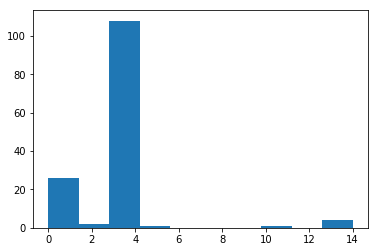

In [6]:
df.ns = df.ns.apply(lambda x: int(x))
plt.hist(df.ns)

In [7]:
df.username.value_counts(normalize = True)

MichaelBillington           0.654930
Choess                      0.049296
Skier Dude                  0.028169
Nixeagle                    0.021127
Fleela                      0.014085
Doma-w                      0.014085
Alastair Haines             0.014085
BeckyAnne                   0.014085
Rmky87                      0.007042
Maias                       0.007042
Brianahier                  0.007042
Bearcat                     0.007042
DagnyB                      0.007042
Cbl62                       0.007042
SpecialWindler              0.007042
Eleoopy                     0.007042
PrestonH                    0.007042
Padraicoc                   0.007042
Poindexter Propellerhead    0.007042
Wombatcat                   0.007042
Johntwrl                    0.007042
Piotrus                     0.007042
Aeronautico                 0.007042
Chrishmt0423                0.007042
Somenamethisis              0.007042
Animum                      0.007042
Jossi                       0.007042
R